In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import requests
import numpy as np
import pandas as pd
import glob
from zipfile import ZipFile

In [4]:
# for year in ['2019', '2020', '2021']:
#   for month in range(1, 7):
#     time = f"{year}0{month}"
#     r = requests.get(f"https://s3.amazonaws.com/tripdata/{time}-citibike-tripdata.csv.zip")
#     with open(f'/content/drive/MyDrive/ml_project/{time}.csv.zip', 'wb') as f:
#       f.write(r.content)

In [ ]:
file_list = glob.glob('/content/drive/MyDrive/ml_project/*.csv.zip')
data = pd.DataFrame()
for file in file_list:
    # opening the zip file in READ mode
    with ZipFile(file, 'r') as zip:
        zip.extractall()
        print('Done extracting', file, "...")
        csvs = glob.glob('*.csv')
        for f in csvs:
            d = pd.read_csv(f)
            month = f.split("-")[0]
            if int(month) > 202101:        
                d = d.rename(columns={"started_at":"starttime","ended_at":"stoptime","start_station_id": "start station id","start_station_name": "start station name","start_lat": "start station latitude","start_lng": "start station longitude","end_station_id": "end station id","end_station_name": "end station name","end_lat": "end station latitude","end_lng": "end station longitude"})
            if data.shape[0] > 0:
                data = data.append(d)
            else:
                data = d

Done extracting /content/drive/MyDrive/ml_project/201901.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201902.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201903.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201904.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201905.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201906.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202001.csv.zip ...


In [9]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_id,rideable_type,member_casual
0,201.0,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612.0,Subscriber,1993.0,1.0,NaN,NaN,NaN
1,505.0,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213.0,Subscriber,1972.0,2.0,NaN,NaN,NaN
2,756.0,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164.0,Subscriber,1985.0,1.0,NaN,NaN,NaN
3,1575.0,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672.0,Customer,1969.0,0.0,NaN,NaN,NaN
4,1566.0,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522.0,Customer,1969.0,0.0,NaN,NaN,NaN


In [10]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])
data["tripminute"] = (data['stoptime'] - data['starttime']).dt.total_seconds() // 60

In [11]:
data['start hour']=data['starttime'].dt.hour.astype('category')
data['start day']=data['starttime'].dt.day.astype('category') 
data['weekday']=data['starttime'].dt.weekday.astype('category')
data['weekend'] = [d >= 5 for d in data['weekday']] # 0=monday

In [46]:
data['start date']=data['starttime'].dt.date.astype('category') 

# Check if the behaviour changed pre-, during, post- pandemic

In [47]:
data_2019 = data[data["starttime"] < pd.to_datetime("2020-01-01")]
data_2020 = data[(data["starttime"] > pd.to_datetime("2019-12-31")) & (data["starttime"] < pd.to_datetime("2021-01-01"))]
data_2021 = data[data["starttime"] > pd.to_datetime("2020-12-31")]

In [48]:
data_2019["start date"].unique()

[2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01-05, ..., 2019-06-26, 2019-06-27, 2019-06-28, 2019-06-29, 2019-06-30]
Length: 181
Categories (181, datetime64[ns]): [2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, ..., 2019-06-27,
                                   2019-06-28, 2019-06-29, 2019-06-30]

In [50]:
data_2019["end station id"].unique()

array([3214, 3638, 3192, 3205, 3277, 3196, 3202, 3267, 3183, 3681, 3270,
       3184, 3185, 3639, 3186, 3207, 3272, 3187, 3273, 3481, 3199, 3276,
       3203, 3213, 3269, 3225, 3275, 3278, 3209, 3483, 3212, 3193, 3279,
       3211, 3194, 3210, 3195, 3268, 3677, 3679, 3280, 3640, 3694, 3198,
       3201, 3206, 3678, 3191, 3220, 3281, 3426, 3709, 514, 523, 513, 459,
       327, 224, 3472, 3002, 477, 468, 3170, 3258, 526, 358, 3541, 303,
       311, 3168, 3750, 487, 195, 3791, 315, 383, 426, 504, 447, 524,
       3360, 3686, 337, 3167, 3664], dtype=object)

In [13]:
data_2019.shape

(170468, 23)

In [14]:
data_2020.shape

(137967, 23)

In [15]:
data_2021.shape

(173873, 23)

Text(0.5, 1.0, '2021')

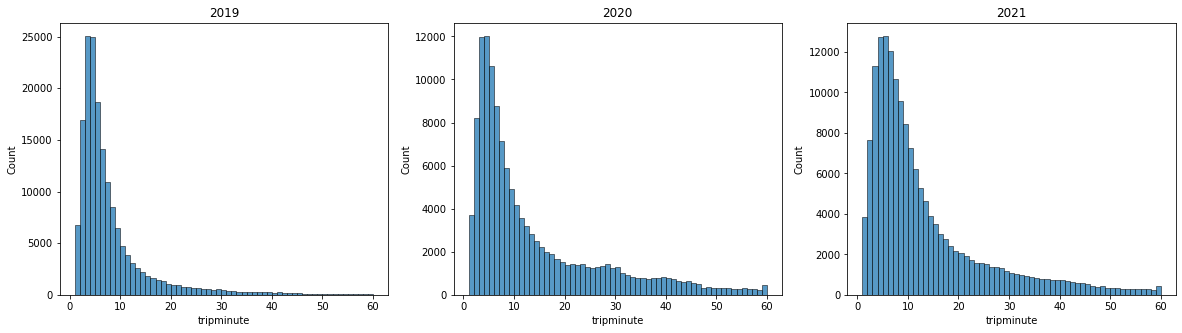

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.histplot(data=data_2019,x="tripminute", bins=range(1,61), ax=ax1)
ax1.set_title("2019")
sns.histplot(data=data_2020,x="tripminute", bins=range(1,61), ax=ax2)
ax2.set_title("2020")
sns.histplot(data=data_2021,x="tripminute", bins=range(1,61), ax=ax3)
ax3.set_title("2021")


Text(0.5, 1.0, '2021')

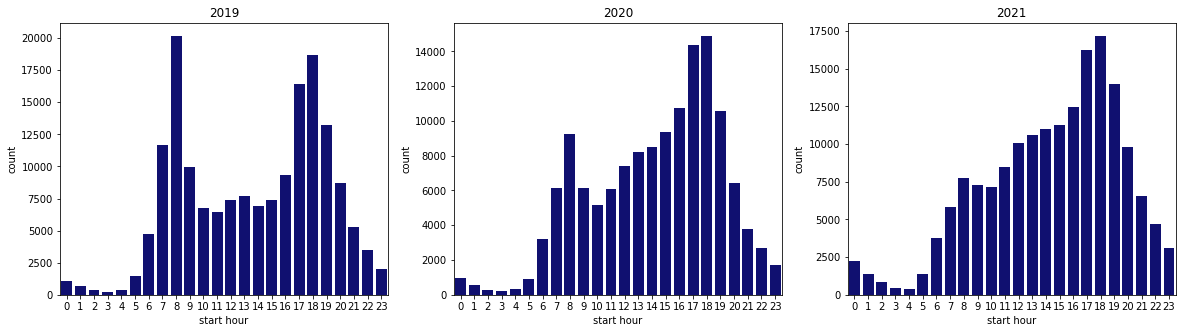

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="start hour", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="start hour", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="start hour", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

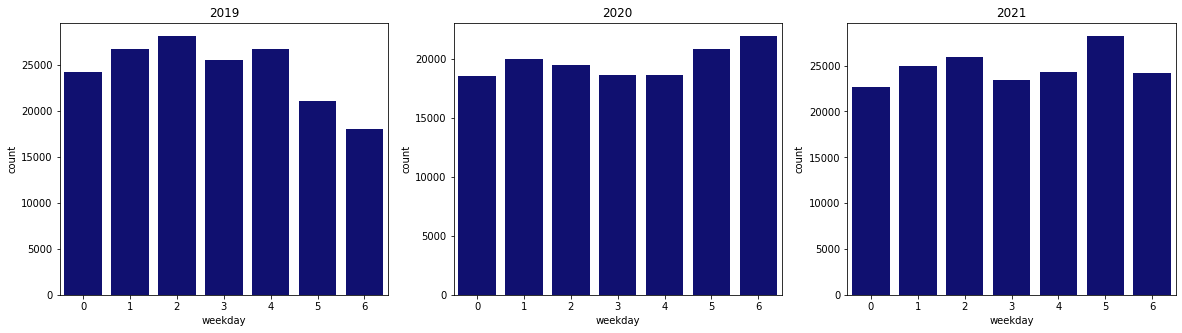

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="weekday", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="weekday", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="weekday", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

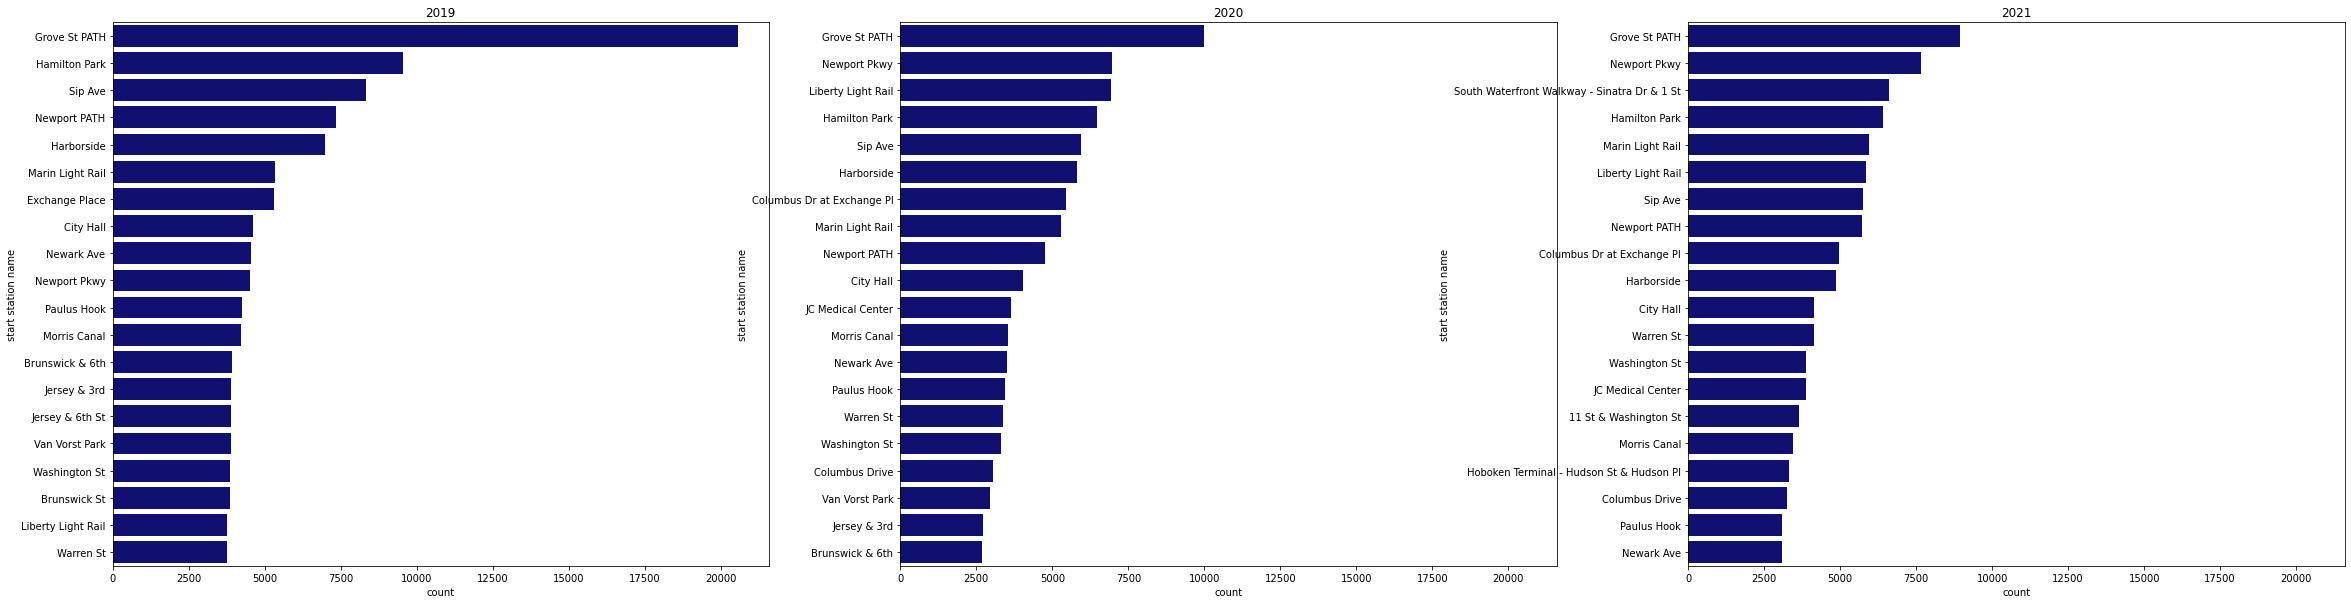

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="start station name", order=data_2019["start station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="start station name", order=data_2020["start station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="start station name", order=data_2021["start station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

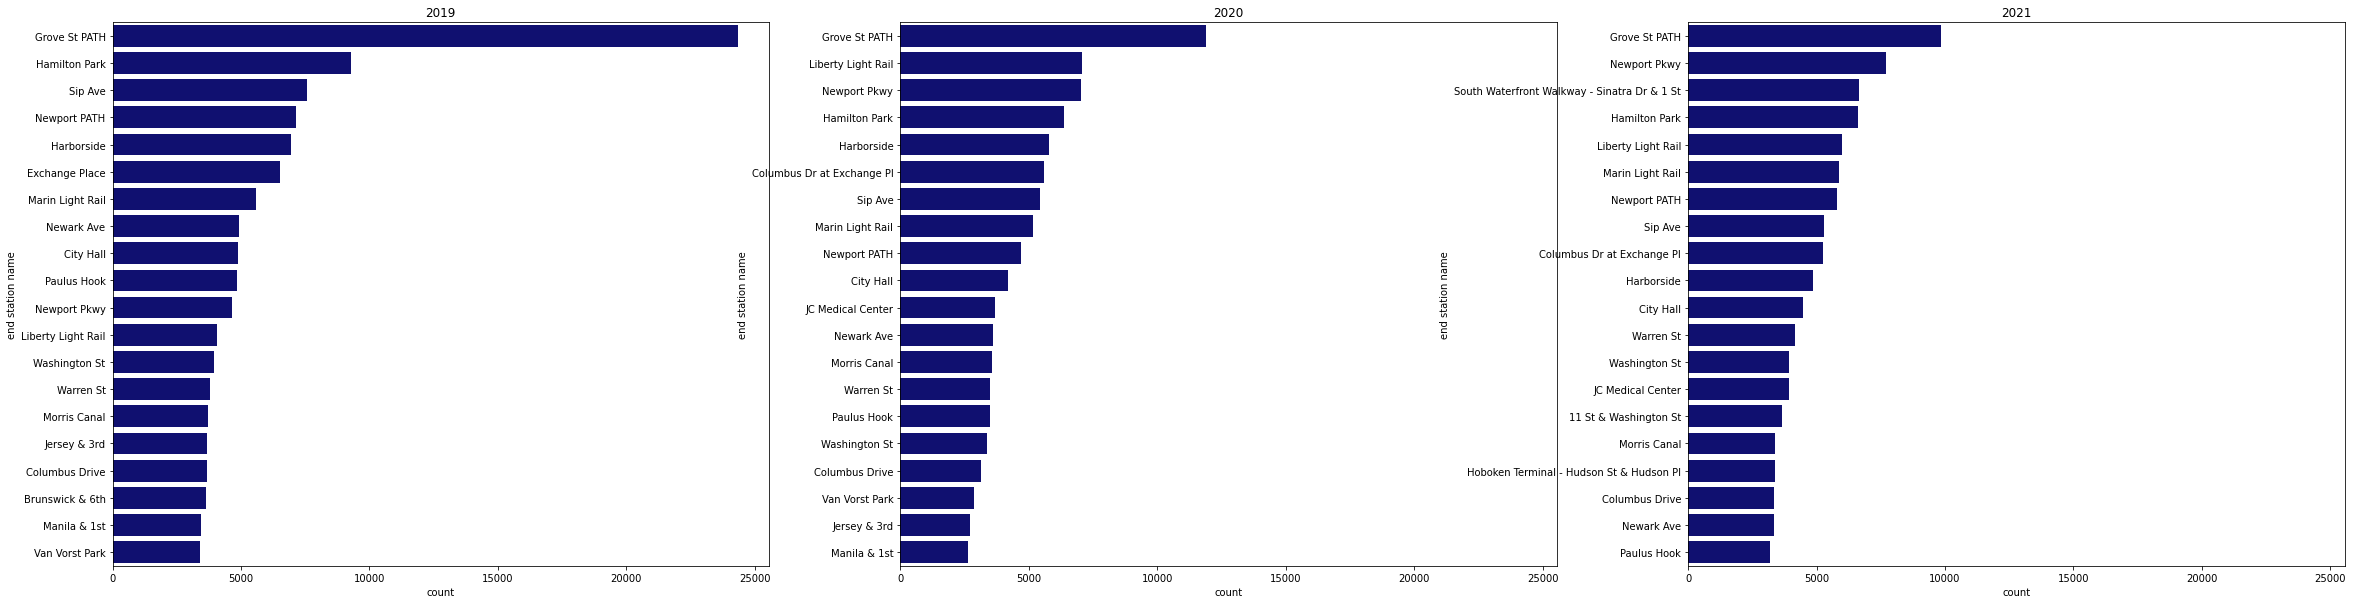

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="end station name", order=data_2019["end station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="end station name", order=data_2020["end station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="end station name", order=data_2021["end station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

### citibike 24h heat map
use "end_station"

In [21]:
## I think we should get the heapmap of the numbers of stations in district first, and then make heatmap of trips in district. and then do predictions.

In [23]:
 !pip install --upgrade geopandas
 !pip install contextily

     |████████████████████████████████| 994 kB 20.7 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 35.5 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [24]:
import geopandas as gpd

In [38]:
stations = data_2019[["start station name", "start station latitude", "start station longitude"]].drop_duplicates(subset=["start station latitude", "start station longitude"])
stations

,start station name,start station latitude,start station longitude
0,Exchange Place,40.716247,-74.033459
817,Paulus Hook,40.714145,-74.033552
1184,City Hall,40.717733,-74.043845
1687,Grove St PATH,40.719586,-74.043117
4348,Warren St,40.721124,-74.038051
4759,Union St,40.718211,-74.083639
4800,Liberty Light Rail,40.711242,-74.055701
5088,Lincoln Park,40.724605,-74.078406
5210,McGinley Square,40.725340,-74.067622
5530,Sip Ave,40.730743,-74.063784


In [44]:
stations.shape

(53, 4)

In [39]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations["start station longitude"], stations["start station latitude"]))

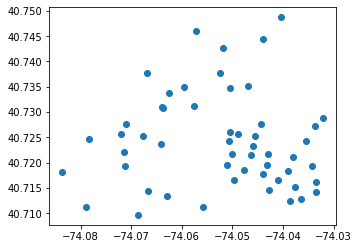

In [40]:
stations_geo.plot()

In [27]:
import contextily as ctx

In [41]:
stations_geo.crs = "EPSG:4326"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until


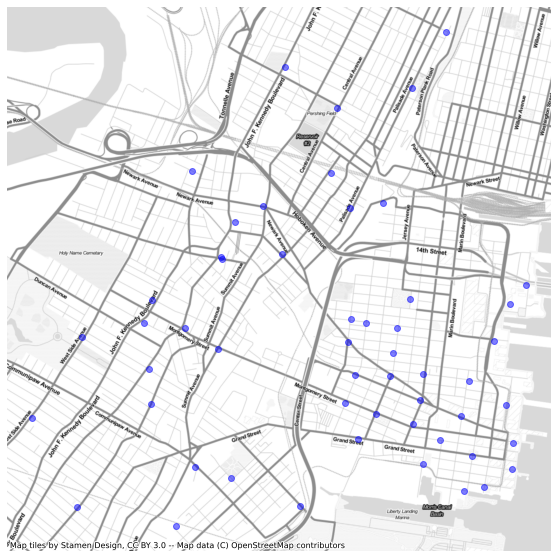

In [42]:
stations_geo = stations_geo.to_crs(epsg=3857)
ax = stations_geo.plot(figsize=(10, 10), alpha=0.5, color='blue')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [31]:
for hour in range(24):
    hour_data = data_2019[data_2019["start hour"]==hour]
    hour_data = hour_data.groupby(by=["start station name"]).count().reset_index()
    
    

### Get weather data